In [512]:
# Import the dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [513]:
# Create a set of random latitudes and longitudes combinations. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs


In [514]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [515]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [516]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [517]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9db81e573cb2ea5274be8d5a55888a45


In [518]:
# Create an empty list to hold the weather data. 
city_data = []
#Print the begining of the logging. 
print("Begining Data Retrieval  ")
print("-------------------------")

#Create counters at 1 because we want both to start at 1 
record_count = 1
set_count = 1

# Loop through all the cities in the list. 
# enumerate() method allows us to get index of the city 
# ... for logging purposes and the city for creating an endpoint URL
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Cloudiness": city_clouds,
                          "Country": city_country,
                          "Date": city_date,  
                          "Humidity": city_humidity,     
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

cessing Record 41 of Set 3 | new norfolk
Processing Record 42 of Set 3 | gornyy
Processing Record 43 of Set 3 | centerville
Processing Record 44 of Set 3 | jalu
Processing Record 45 of Set 3 | whitefish
Processing Record 46 of Set 3 | darnah
Processing Record 47 of Set 3 | kota bahru
Processing Record 48 of Set 3 | bontang
Processing Record 49 of Set 3 | leninskoye
Processing Record 50 of Set 3 | flin flon
Processing Record 1 of Set 4 | leshukonskoye
Processing Record 2 of Set 4 | martina franca
Processing Record 3 of Set 4 | sawakin
Processing Record 4 of Set 4 | bulgan
Processing Record 5 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 4 | qaanaaq
Processing Record 7 of Set 4 | nanortalik
Processing Record 8 of Set 4 | vaitape
Processing Record 9 of Set 4 | san rafael
Processing Record 10 of Set 4 | vila velha
Processing Record 11 of Set 4 | tabas
Processing Record 12 of Set 4 | castro
Processing Record 13 of Set 4 | kapaa
Processing Record 14 of Set 4 | dik

In [519]:
### Creating a DataFrame of City Weather Data 
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bredasdorp,29,ZA,2020-07-20 04:37:01,93,-34.53,20.04,53.60,1.12
1,Upernavik,19,GL,2020-07-20 04:37:22,57,72.79,-56.15,48.52,5.57
2,Codrington,80,AU,2020-07-20 04:38:07,73,-38.27,141.97,52.61,12.24
3,Arraial Do Cabo,0,BR,2020-07-20 04:37:01,85,-22.97,-42.03,70.34,21.77
4,Richards Bay,0,ZA,2020-07-20 04:36:10,75,-28.78,32.04,55.67,7.18
5,Cherskiy,0,RU,2020-07-20 04:37:02,35,68.75,161.30,74.95,1.07
6,Itarema,20,BR,2020-07-20 04:36:20,87,-2.92,-39.92,74.30,9.98
7,Beringovskiy,64,RU,2020-07-20 04:37:55,72,63.05,179.32,45.41,10.38
8,Trelew,100,AR,2020-07-20 04:38:46,83,-43.25,-65.31,44.74,10.63
9,Rocha,100,UY,2020-07-20 04:40:37,91,-34.48,-54.33,64.87,5.41


In [520]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2020-07-20 04:37:01,-34.53,20.04,53.60,93,29,1.12
1,Upernavik,GL,2020-07-20 04:37:22,72.79,-56.15,48.52,57,19,5.57
2,Codrington,AU,2020-07-20 04:38:07,-38.27,141.97,52.61,73,80,12.24
3,Arraial Do Cabo,BR,2020-07-20 04:37:01,-22.97,-42.03,70.34,85,0,21.77
4,Richards Bay,ZA,2020-07-20 04:36:10,-28.78,32.04,55.67,75,0,7.18
5,Cherskiy,RU,2020-07-20 04:37:02,68.75,161.30,74.95,35,0,1.07
6,Itarema,BR,2020-07-20 04:36:20,-2.92,-39.92,74.30,87,20,9.98
7,Beringovskiy,RU,2020-07-20 04:37:55,63.05,179.32,45.41,72,64,10.38
8,Trelew,AR,2020-07-20 04:38:46,-43.25,-65.31,44.74,83,100,10.63
9,Rocha,UY,2020-07-20 04:40:37,-34.48,-54.33,64.87,91,100,5.41


In [521]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [522]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [523]:
#import the time module.
import time

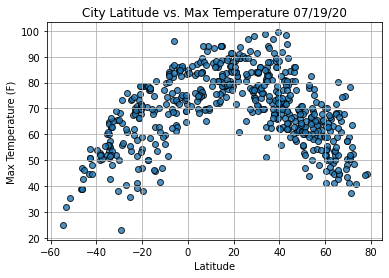

In [524]:
# Build the scatter plot for latitude vs. max temperature. 
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties 
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

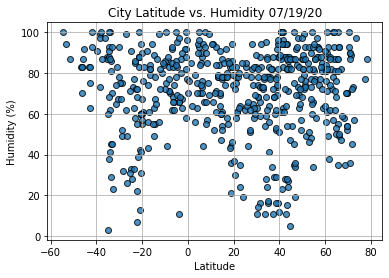

In [525]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show() 

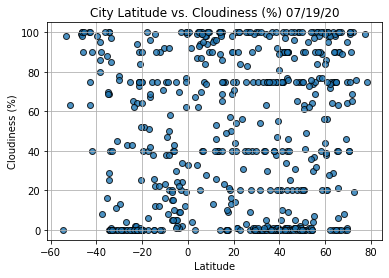

In [526]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

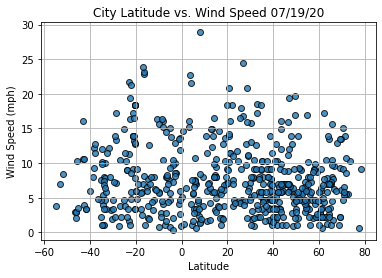

In [527]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [528]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [529]:
index13 = city_data_df.loc[13]
index13

City                Leningradskiy
Country                        RU
Date          2020-07-20 04:37:53
Lat                         69.38
Lng                        178.42
Max Temp                    43.39
Humidity                       70
Cloudiness                      1
Wind Speed                   9.33
Name: 13, dtype: object

In [530]:
# Finding northern hemisphere lats 
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
552     True
553    False
554     True
555     True
556    False
Name: Lat, Length: 557, dtype: bool

In [531]:
# Returning a DataFrame with all data fitting the criteria for lats greater than or equal to 0, use the "loc" method 
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2020-07-20 04:37:01,-34.53,20.04,53.60,93,29,1.12
1,Upernavik,GL,2020-07-20 04:37:22,72.79,-56.15,48.52,57,19,5.57
2,Codrington,AU,2020-07-20 04:38:07,-38.27,141.97,52.61,73,80,12.24
3,Arraial Do Cabo,BR,2020-07-20 04:37:01,-22.97,-42.03,70.34,85,0,21.77
4,Richards Bay,ZA,2020-07-20 04:36:10,-28.78,32.04,55.67,75,0,7.18


In [532]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

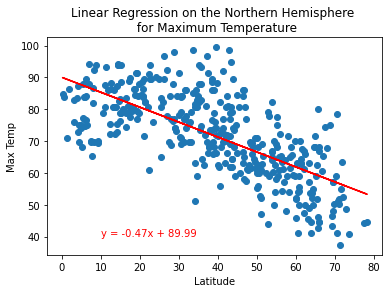

In [533]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Northern Hemisphere \n for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

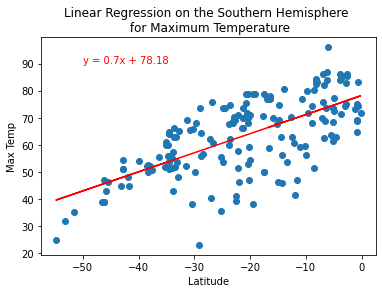

In [534]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Southern Hemisphere \n for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature','Max Temp',(-50,90))

In [535]:
# Summary of findings - The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

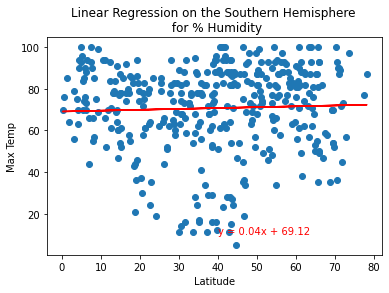

In [536]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("Linear Regression on the Southern Hemisphere \n for % Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity','Max Temp',(40,10))

In [537]:
# Summary of findings: 

# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

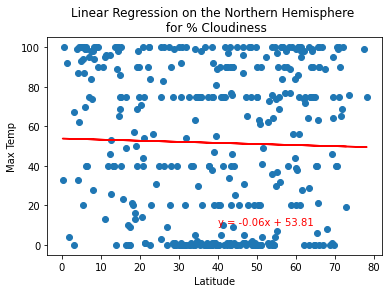

In [552]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title("Linear Regression on the Northern Hemisphere \n for % Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity','Max Temp',(40,10))

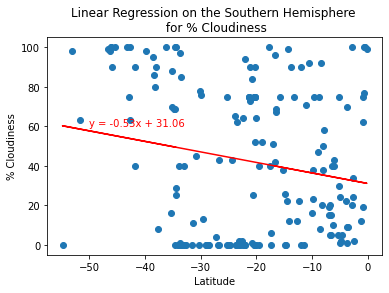

In [540]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("Linear Regression on the Southern Hemisphere \n for % Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [541]:
# Summary of findings: The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

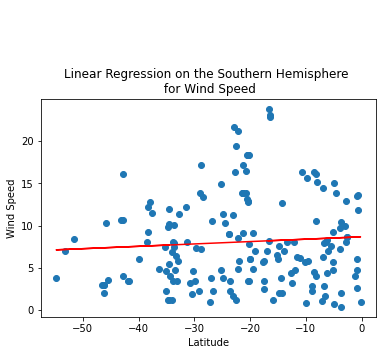

In [548]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

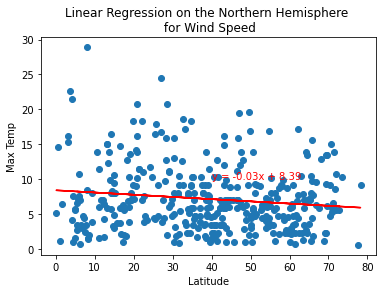

In [551]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed','Max Temp',(40,10))

In [553]:
# Summary of Findings - The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here . This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here . This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 